# Implementation of Gradient Descent For Simple Linear Regression
## Loading and Preprocessing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
############### PART 1
data = pd.read_csv("KCSmall2.csv", header=None)

In [4]:
data.columns = ["x","y"]
data.head(5)

,x,y
0,1.18,22.19
1,2.57,53.80
2,0.77,18.00
3,1.96,60.40
4,1.68,51.00


In [5]:
x = data["x"]
y = data["y"]

We can visualize the relationship between Square Footage and Sale Price using a Scatterplot.

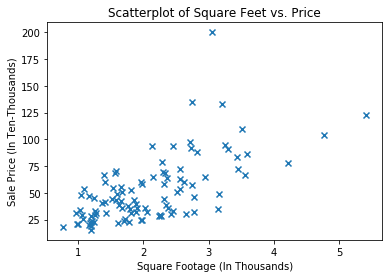

In [6]:
#1
plt.scatter(data["x"],data["y"], marker="x")
plt.title("Scatterplot of Square Feet vs. Price")
plt.xlabel("Square Footage (In Thousands)")
plt.ylabel("Sale Price (In Ten-Thousands)")
plt.show()

## Preperation For GD
We can define our loss function as $\frac{1}{2}$MSE = $\frac{1}{2}$x$\sum_{i=1}^m (\hat{y_{i}} - y_{i})^2$, where $\hat{y_{i}}$ = $\theta_{0}$ + $\theta_{1}\cdot x_{1}$ + $\theta_{2}\cdot x_{2}$ + ...... + $\theta_{n}\cdot x_{n}$ for n variables and m observations with $\theta_{0}$ as the intercept and $x_{0}$ = 1.

In Simple Linear Regression (n=1), our loss function which we are attempting to **minimize** will be:


 $\frac{1}{2}$x$\sum_{i=1}^m (\theta_{0} + \theta_{1}\cdot x_{1}\ - y_{i})^2$


In [136]:
#2
# Create Loss Function
def mse(y_pred,y_true):
    return(round(.5*np.square(np.subtract(y_pred,y_true)).mean(),2))
#For theta = (0,0)
y_pred_0_0 = 0*x + 0
print('Loss Function Value for theta_0 = 0 and theta_1 = 0 is: %d ' %mse(y_pred_0_0,y))
y_pred_neg1_20 = 20*x -1
print('Loss Function Value for theta_0 = -1 and theta_1 = 20 is: %d ' %mse(y_pred_neg1_20,y))


Loss Function Value for theta_0 = 0 and theta_1 = 0 is: 1806 
Loss Function Value for theta_0 = -1 and theta_1 = 20 is: 330 


In [137]:
#Create Empty Dataframe to hold informartion
loop_data = pd.DataFrame(index=list(range(64)),columns=['Intercept','Slope','Iteration','Loss','Learning Rate'])
loop_data

,Intercept,Slope,Iteration,Loss,Learning Rate
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


## Gradient Descent For Simple Linear Regression
We will use 4 differerent learning rates with 15 epochs (iterations of gradient descent) each.

In [138]:
# Building the model
epochs = 15  # The number of iterations to perform gradient descent
L_1 = [0.01,0.1,0.2,0.4]  # The learning Rates
n = float(len(x)) # Number of elements in x (& y)

# Performing Gradient Descent 
for i in range(len(L_1)):
    m = 0 #Initialize Slope
    c = 0 #Initialize Intercept
    for j in range(epochs+1): 
        y_pred = m*x + c                                 #The current predicted value of Y
        loop_data.at[(i)*16 + j, 'Intercept'] = c        #Append Intercept
        loop_data.at[(i)*16 + j, 'Slope'] = m            #Append Slope
        loop_data.at[(i)*16 + j, 'Iteration'] = j        #Append Iteration
        loop_data.at[(i)*16 + j, 'Loss'] = mse(y_pred,y) #Append Loss
        loop_data.at[(i)*16 + j, 'Learning Rate'] = L_1[i] #Append Learning Rate
        D_m = (-1/n) * sum(x * (y - y_pred))             #Calculate Partial With Respect To Slope
        D_c = (-1/n) * sum(y - y_pred)                   #Calculate Partial With Respect To Intercept
        
        c = c - L_1[i] * D_c                               #Update Intercept
        m = m - L_1[i] * D_m                               #Update Slope
print(loop_data.to_string)    
    

<bound method DataFrame.to_string of    Intercept    Slope Iteration         Loss Learning Rate
0          0        0         0      1806.55          0.01
1   0.519149  1.25313         1      1628.06          0.01
2    1.00693  2.43156         2      1470.25          0.01
3    1.46522  3.53975         3      1330.74          0.01
4    1.89579   4.5819         4      1207.39          0.01
5    2.30027  5.56195         5      1098.34          0.01
6    2.68025  6.48361         6      1001.92          0.01
7    3.03717  7.35036         7       916.68          0.01
8    3.37242  8.16549         8       841.32          0.01
9    3.68729  8.93208         9       774.69          0.01
10     3.983  9.65303        10       715.78          0.01
11   4.26069  10.3311        11        663.7          0.01
12   4.52145  10.9687        12       617.65          0.01
13   4.76628  11.5685        13       576.94          0.01
14   4.99613  12.1325        14       540.95          0.01
15   5.21191  12.66

## Effect of Learning Rate
As we can see, learning rate affects the rate 'descent' (hopefully) down the error function.

- 0.01 may be too small that computationally we would need more epochs to reach the minimum of our loss function.
- 0.1 and 0.2 seem to quickly approach the global minimum and stay there since GD will be always monotonically decreasing if appropriate learning rates are chosen.
- 0.4 is too large of a learning rate as it actually overshoots the minimum and diverges.
    - Note: A learning rate too large can often lead to complete divergence or oscilation around minimmum during gradient descent.

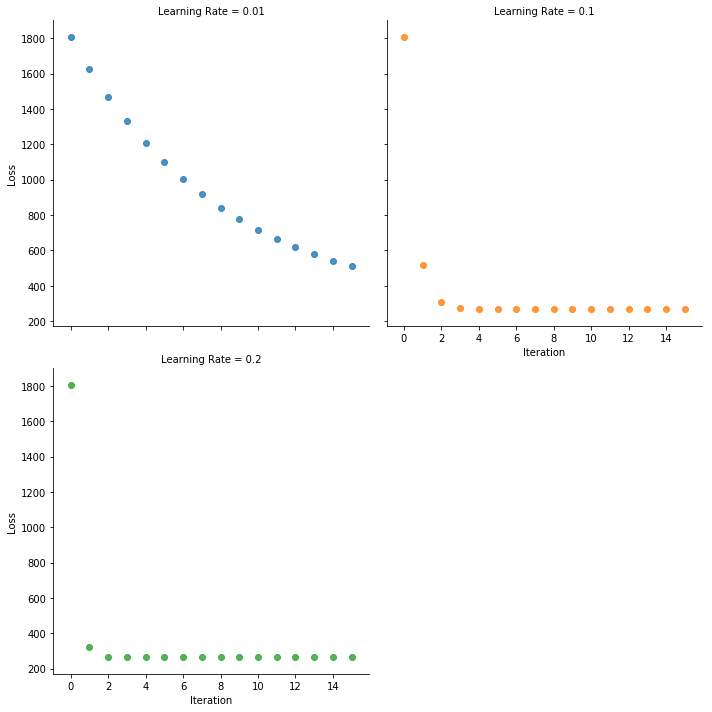

In [139]:
#3
plot_data=loop_data.copy(deep=True)
plot_data["Learning Rate"] = plot_data["Learning Rate"].apply(str)
sns.lmplot('Iteration', 'Loss', data=plot_data[plot_data['Learning Rate'] != '0.4'], hue='Learning Rate', col='Learning Rate', 
           col_wrap=2,fit_reg=False)
plt.show()


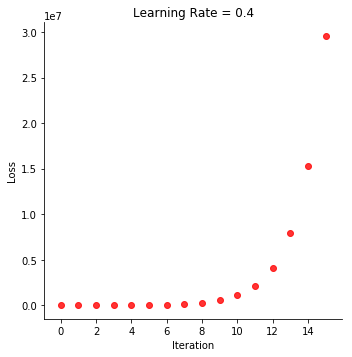

In [140]:
sns.lmplot('Iteration', 'Loss', data=plot_data[plot_data['Learning Rate'] == '0.4'],scatter_kws={'color': 'red'},fit_reg=False)
plt.title("Learning Rate = 0.4")
plt.show()

## Optimal Parameter Values
We can choose the parameter values which minimize our loss function. If error rates are appropriately chosen as not too large, then the minimum error will be on the final epoch as GD will be monotonically decreasing. Thus, 0.1 and 0.2 which seem to be the preferred learning rates for 15 epochs reach the minimum on their 15th and final epoch.

In our case, 0.01 does not reach the minimum in 15 epochs as it needs more time to 'descend' the loss function. Additionally, 0.4 diverges and actually increases the error.

In [141]:
for i in range(len(L_1)):
    temp = loop_data[loop_data['Learning Rate'] == L_1[0]]
    temp['Loss'] = temp.Loss.astype(float)
    min = temp[['Loss']].idxmin() 
    print('For Learning rate %s ,'%temp.loc[min[0],'Learning Rate'], 'minimum Loss is %d' %temp[['Loss']].min(), 
    'for theta_0 = %d' %temp.loc[min[0],'Intercept'],
    'and theta_1 = %d' %temp.loc[min[0],'Slope'],
    'occuring at iteration %d' %temp.loc[min[0],'Iteration'])
    #Calculate Predicted Value for x=3.5
    y_pred_three_five = temp.loc[min,'Slope']*3.5 + temp.loc[min[0],'Intercept']


    print('Predicted y value for x = 3.5 is: %d.' % y_pred_three_five.iloc[0])

    #Calculate Predicted Value for x=7
    y_pred_seven = temp.loc[min,'Slope']*7 + temp.loc[min[0],'Intercept']

    print('Predicted y value for x = 7 is: %d.' % y_pred_seven.iloc[0])
    print('----------------------------------------------------------------------------------------------------------')


For Learning rate 0.01 , minimum Loss is 509 for theta_0 = 5 and theta_1 = 12 occuring at iteration 15
Predicted y value for x = 3.5 is: 49.
Predicted y value for x = 7 is: 93.
----------------------------------------------------------------------------------------------------------
For Learning rate 0.01 , minimum Loss is 509 for theta_0 = 5 and theta_1 = 12 occuring at iteration 15
Predicted y value for x = 3.5 is: 49.
Predicted y value for x = 7 is: 93.
----------------------------------------------------------------------------------------------------------
For Learning rate 0.01 , minimum Loss is 509 for theta_0 = 5 and theta_1 = 12 occuring at iteration 15
Predicted y value for x = 3.5 is: 49.
Predicted y value for x = 7 is: 93.
----------------------------------------------------------------------------------------------------------
For Learning rate 0.01 , minimum Loss is 509 for theta_0 = 5 and theta_1 = 12 occuring at iteration 15
Predicted y value for x = 3.5 is: 49.
Predict

/Users/alexandertryforos/anaconda3/envs/Digital_Ag/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Implementation of Gradient Descent For Multiple Linear Regression
We will now examine GD for multiple linear regression with 3 predictor variables and 1 response.
## Loading and Preprocessing Data

In [142]:
############### PART 2
data2 = pd.read_csv("KCSmall_NS2.csv", header=None)
data2.columns = ['n_bed', 'liv_area', 'lot_area', 'h_price']
#1
data2.head(5)

,n_bed,liv_area,lot_area,h_price
0,3,1180,5650,221900.0
1,3,2570,7242,538000.0
2,2,770,10000,180000.0
3,4,1960,5000,604000.0
4,3,1680,8080,510000.0


In [143]:
#2
from sklearn import preprocessing
data2scale = data2
data2scale.loc[:,['n_bed', 'liv_area', 'lot_area']] = preprocessing.scale(data2scale.loc[:,['n_bed', 'liv_area', 'lot_area']])
data2scale.insert(0,"Intercept",1)
data2scale.head(5)

,Intercept,n_bed,liv_area,lot_area,h_price
0,1,-0.508001,-1.061318,-0.413048,221900.0
1,1,-0.508001,0.562100,-0.304939,538000.0
2,1,-1.778002,-1.540168,-0.117650,180000.0
3,1,0.762001,-0.150335,-0.457188,604000.0
4,1,-0.508001,-0.477355,-0.248033,510000.0


## Preperation For GD
In Multiple Linear Regression with n=3, our loss function which we are attempting to **minimize** will be:


 $\frac{1}{2}$x$\sum_{i=1}^m (\theta_{0} + \theta_{1}\cdot x_{1}\ + \theta_{2}\cdot x_{2}\ + \theta_{3}\cdot x_{3}\ - y_{i})^2$
 
Since our prior loss function was defined in terms of $\hat{y}$, we can use the same Python function.

In [144]:
#3
#Create 0 Vector
initial_j = pd.Series([0,0,0,0],index=['Intercept','n_bed', 'liv_area', 'lot_area'])
#Take Dot Product
y_pred_initial_j = data2scale.loc[:,['Intercept','n_bed', 'liv_area', 'lot_area']].dot(initial_j)
#Calculate MSE
print('Loss Function Value for theta_0 = 0 and theta_1 = 0 is: %d ' %mse(y_pred_initial_j,data2scale['h_price']))


Loss Function Value for theta_0 = 0 and theta_1 = 0 is: 180784127566 


In [145]:
error = pd.Series(y_pred_initial_j - data2scale['h_price'])
error_dot =error.dot(data2scale.loc[:,['Intercept','n_bed', 'liv_area', 'lot_area']])
0.5*error_dot.mean()

-12016513.456005225

In [146]:
#4
#Create Empty Dataframe to hold informartion
loop_data2 = pd.DataFrame(index=list(range(255)),
                          columns=['Theta0','Theta1','Theta2','Theta3','Iteration','Loss','Learning Rate'])
loop_data2

,Theta0,Theta1,Theta2,Theta3,Iteration,Loss,Learning Rate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## GD
We will use 5 differerent learning rates with 50 epochs each.

In [151]:
# Building the model
epochs = 50  # The number of iterations to perform gradient descent
L_2 = [0.01, 0.1, 0.5, 1.0, 1.5]  # The learning Rates
n = float(len(data2['h_price'])) # Number of elements in x (& y)

# Performing Gradient Descent 
for i in range(len(L)):
    theta0 = 0 #Initialize theta0
    theta1 = 0 #Initialize theta1
    theta2 = 0 #Initialize theta2
    theta3 = 0 #Initialize theta3

    for j in range(epochs+1): 
        initial_j = pd.Series([theta0,theta1,theta2,theta3],
                      index=['Intercept','n_bed', 
                             'liv_area', 'lot_area'])    #Get Initial Vector
        y_pred_j = data2scale.loc[:,['Intercept','n_bed', 
                                     'liv_area', 
                                     'lot_area']
                                 ].dot(initial_j)        #Take Dot Product To Get Predicted Value
        loop_data2.at[(i)*51 + j, 'Theta0'] = theta0     #Append theta0
        loop_data2.at[(i)*51 + j, 'Theta1'] = theta1     #Append theta1
        loop_data2.at[(i)*51 + j, 'Theta2'] = theta2     #Append theta2
        loop_data2.at[(i)*51 + j, 'Theta3'] = theta3     #Append theta3
        loop_data2.at[(i)*51 + j, 'Iteration'] = j       #Append Iteration
        loop_data2.at[(i)*51 + j, 
                      'Loss'] = mse(y_pred_j,
                                    data2['h_price'])    #Append Loss
        loop_data2.at[(i)*51 + j, 
                      'Learning Rate'] = L_2[i]            #Append Learning Rate
        D_theta0 = (-1/n) * sum(data2['h_price'] - 
                                y_pred_j)                #Calculate Partial With Respect To theta0
        
        error = pd.Series(y_pred_j -                     #Calculate Residual
                          data2scale['h_price'])
        
        D_thetas =   (data2scale.loc[:,
                                     ['Intercept','n_bed'
                                      , 'liv_area', 
                                      'lot_area']].transpose()*
                      (error)).mean(axis=1) #Finish calculation of Partial With Respect To Slopes
        
        theta0 = theta0 - L_2[i] * D_theta0                  #Update theta0
        theta1 = theta1 - L_2[i] * D_thetas[1]               #Update Slope
        theta2 = theta2 - L_2[i] * D_thetas[2]               #Update Slope
        theta3 = theta3 - L_2[i] * D_thetas[3]               #Update Slope

print(loop_data2.to_string())


      Theta0       Theta1       Theta2       Theta3 Iteration         Loss Learning Rate
0          0            0            0            0         0  1.80784e+11          0.01
1    5192.51      1073.12      1973.78      1373.81         1  1.77414e+11          0.01
2    10333.1      2122.82      3914.97      2722.78         2  1.74122e+11          0.01
3    15422.3      3149.53      5824.16      4047.35         3  1.70905e+11          0.01
4    20460.5      4153.71      7701.91      5347.96         4  1.67762e+11          0.01
5    25448.4      5135.78      9548.78      6625.03         5  1.64692e+11          0.01
6    30386.5      6096.16      11365.3      7878.98         6  1.61691e+11          0.01
7    35275.1      7035.27      13152.1       9110.2         7  1.58759e+11          0.01
8    40114.9      7953.51      14909.6      10319.1         8  1.55894e+11          0.01
9    44906.2      8851.29      16638.4      11506.1         9  1.53094e+11          0.01
10   49649.7      972

## Effect of Learning Rate
As we can see, learning rate affects the rate 'descent' (hopefully) down the error function.

- 0.01 may be too small that computationally we would need more epochs to reach the minimum of our loss function.
- 0.1, 0.2 and 1 seem to quickly approach the global minimum and stay there since GD will be always monotonically decreasing if appropriate learning rates are chosen.
- 1.5 is too large of a learning rate as it actually overshoots the minimum and diverges.

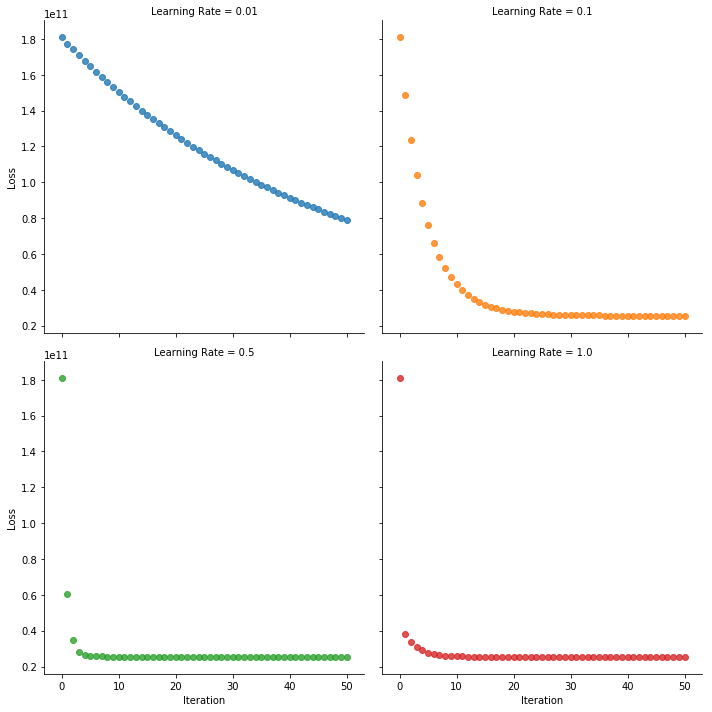

In [152]:
plot_data2=loop_data2.copy(deep=True)
plot_data2["Learning Rate"] = plot_data2["Learning Rate"].apply(str)
sns.lmplot('Iteration', 'Loss', data=plot_data2[plot_data2['Learning Rate'] != '1.5'], hue='Learning Rate', col='Learning Rate', 
           col_wrap=2, fit_reg=False)
plt.show()

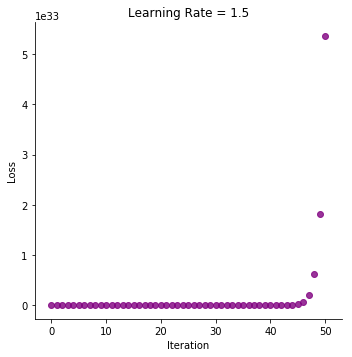

In [153]:
sns.lmplot('Iteration', 'Loss', data=plot_data2[plot_data2['Learning Rate'] == '1.5'], scatter_kws={'color': 'purple'}, fit_reg=False)
plt.title('Learning Rate = 1.5')
plt.show()

## Optimal Parameter Values
We can choose the parameter values which minimize our loss function. If error rates are appropriately chosen as not too large, then the minimum error will be on the final epoch as GD will be monotonically decreasing. Thus, 0.1, 0.5 and 1 which seem to be the preferred learning rates for 50 epochs reach the minimum on their 50th and final epoch.

In our case, 0.01 does not reach the minimum in 15 epochs as it needs more time to 'descend' the loss function. Additionally, 1.5 diverges and actually increases the error.

In [154]:
#4
#Preproccessing for For Loop: Standardizing for n_bed = 3, liv_area = 2000, lot_area = 8550
norm_n_bed = (3 - data2['n_bed'].mean())/data2['n_bed'].std()
norm_liv_area = (2000 - data2['liv_area'].mean())/data2['liv_area'].std()
norm_lot_area = (8550 - data2['lot_area'].mean())/data2['lot_area'].std()
#For Loop
print('----------------------------------------------------------------------------------------------------------')
for i in range(len(L_2)):
    temp = loop_data2[loop_data2['Learning Rate']==L_2[i]]
    temp['Loss'] = temp.Loss.astype(float)
    min = temp[['Loss']].idxmin() 

    print('For Learning Rate %s' %temp.loc[min[0],'Learning Rate'],'Minimum Loss is %d' %temp[['Loss']].min(), 
      'for theta_0 = %d' %temp.loc[min,'Theta0'],
      'and theta_1 = %d' %temp.loc[min,'Theta1'],
      'and theta_2 = %d' %temp.loc[min,'Theta2'],
      'and theta_3 = %d' %temp.loc[min,'Theta3'],
      'occuring at iteration %d.' %temp.loc[min,'Iteration'])

    y_pred_new = temp.loc[min,'Theta0']*1 + temp.loc[min,'Theta1']*norm_n_bed + temp.loc[min,'Theta2']*norm_liv_area + temp.loc[min,'Theta3']*norm_lot_area 
    
    print('Predicted y value for n_bed = 3, liv_area = 2000, lot_area = 8550 is: %d.' % y_pred_new)
    print('----------------------------------------------------------------------------------------------------------')




----------------------------------------------------------------------------------------------------------
For Learning Rate 0.01 Minimum Loss is 79001804198 for theta_0 = 205100 and theta_1 = 32092 and theta_2 = 68089 and theta_3 = 45323 occuring at iteration 50.
Predicted y value for n_bed = 3, liv_area = 2000, lot_area = 8550 is: 521369918.
----------------------------------------------------------------------------------------------------------
For Learning Rate 0.1 Minimum Loss is 25519752675 for theta_0 = 516574 and theta_1 = 18236 and theta_2 = 151735 and theta_3 = 62177 occuring at iteration 50.
Predicted y value for n_bed = 3, liv_area = 2000, lot_area = 8550 is: 831471148.
----------------------------------------------------------------------------------------------------------
For Learning Rate 0.5 Minimum Loss is 25455434702 for theta_0 = 519250 and theta_1 = 7733 and theta_2 = 166313 and theta_3 = 53713 occuring at iteration 50.
Predicted y value for n_bed = 3, liv_area = 

/Users/alexandertryforos/anaconda3/envs/Digital_Ag/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
